tensor([[ 0.0466,  0.8019],
        [-2.0222,  0.3156],
        [-0.3841, -0.3224],
        [-1.3123,  0.3505],
        [-0.8876, -0.1918],
        [-1.6158, -0.0387],
        [-2.4348, -0.3101],
        [ 2.1003,  0.1909],
        [-0.5045, -1.4441],
        [ 1.1447, -1.1006],
        [ 0.5828,  0.0422],
        [ 0.0773,  0.4235],
        [ 1.1111,  1.9047],
        [ 0.6184,  0.0778],
        [-0.2486,  2.5283],
        [-1.8964,  2.1907],
        [-0.7752, -0.0246],
        [ 0.5505, -1.2301],
        [-0.8595,  0.8462],
        [-0.6174, -0.1104],
        [ 0.2135,  0.9863],
        [-2.3015,  0.8654],
        [-0.3198,  0.6801],
        [ 0.4089,  1.1214],
        [ 0.1377,  0.5295],
        [-0.6387, -0.3753],
        [-0.1747,  0.4952],
        [-0.8779, -0.1724],
        [-0.3522,  0.3002],
        [-0.9537,  0.7406],
        [-0.9358, -0.1229],
        [ 0.0326, -0.2662],
        [-0.6837,  0.9009],
        [ 0.4101,  0.1866],
        [-0.1191, -0.1364],
        [-1.1443,  0

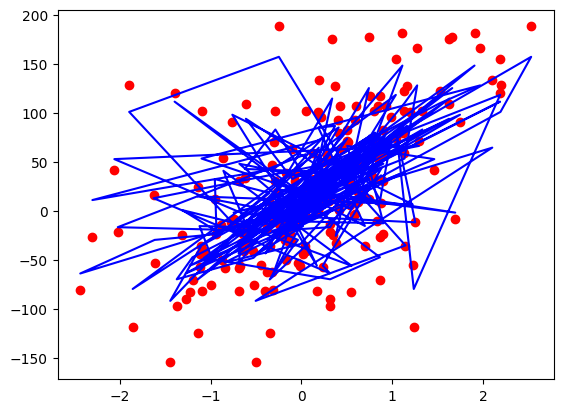

In [41]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torchvision
from torch.utils.data import Dataset, DataLoader
import math



x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = x.shape
input_size, output_size = n_features, 1

print(x, x.shape)
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
            super(LinearRegression, self).__init__()
            self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
            return self.lin(x)

model = LinearRegression(input_size, output_size)
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_iters = 100
for i in range(n_iters):
    y_predicted = model(x)
    loss_value = criterion(y_predicted, y)

    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()

predicted = model(x).detach().numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

In [42]:


# 0) Prepare data
class Framingham(Dataset):

    def __init__(self):
        xy = np.loadtxt('framingham.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]
        X_train, X_test, y_train, y_test = train_test_split(xy[:, 1:], xy[:, [0]], test_size=0.2, random_state=1234)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        self.X_train = torch.from_numpy(X_train.astype(np.float32))
        self.X_test = torch.from_numpy(X_test.astype(np.float32))
        self.y_train = torch.from_numpy(y_train.astype(np.float32))
        self.y_test = torch.from_numpy(y_test.astype(np.float32))
        
    def __getitem__(self, index):
        return self.X_train[index], self.y_train[index]

    def __len__(self):
        return self.n_samples

dataset = Framingham()
first_data = dataset[0]
features, labels = first_data
n_features = len(features)


# 1) Define model

class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

# 2) Loss and Optimiser

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100

for epoch in range(num_epochs):
    y_predicted = model(dataset.X_train)
    loss = criterion(y_predicted, dataset.y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

with torch.no_grad():
    y_predicted = model(dataset.X_test)
    y_predicted_cls = y_predicted.round()
    acc = (y_predicted_cls == dataset.y_test).sum().item() / dataset.y_test.shape[0]
    print(f'Accuracy: {acc}')


torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size([3390, 1])
torch.Size

In [36]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1])
# nsamples × nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.11], [2.0, 1.0, 0.11], [0.1, 3.0, 0.11 ]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.11], [0.1, 1.0, 2.11], [0.1, 3.0, 0.11 ]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print (l2.item ())

_, predictions1 = torch. max (Y_pred_good, 1)
_, predictions2 = torch. max (Y_pred_bad, 1)

print(predictions1)
print (predictions2)

0.30126112699508667
1.6235767602920532
tensor([2, 0, 1])
tensor([0, 2, 1])
